### What is the relationship between sick leave and Job Title (PersonType)?

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<Figure size 1000x700 with 0 Axes>

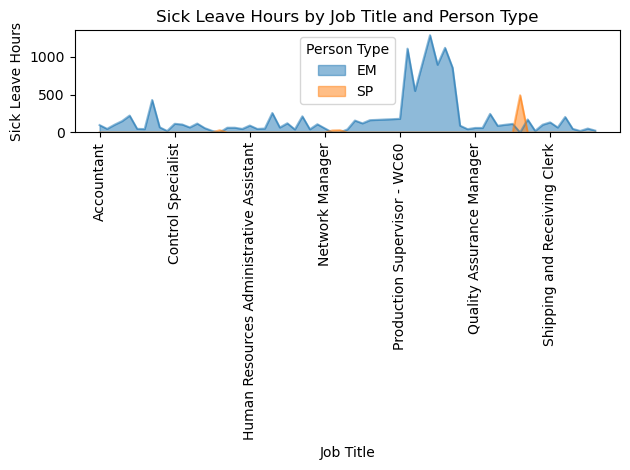

In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query
sql_query = """
SELECT [JobTitle]
    ,[SickLeaveHours]
    ,[PersonType]
FROM [AdventureWorks2022].[HumanResources].[Employee] e
JOIN [Person].[Person] p ON p.BusinessEntityID = e.BusinessEntityID
"""

# Execute the SQL query and store the result in a pandas DataFrame
person_leave_df = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Create a pivot table
pivot_df = person_leave_df.pivot_table(index='JobTitle', columns='PersonType', values='SickLeaveHours', aggfunc='sum')

# Plot the data
plt.figure(figsize=(10, 7))
pivot_df.plot(kind='area', stacked=False)
plt.title('Sick Leave Hours by Job Title and Person Type')
plt.xlabel('Job Title')
plt.ylabel('Sick Leave Hours')
plt.xticks(rotation=90)
plt.legend(title='Person Type')
plt.tight_layout()
plt.show()
